In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from qutip import fidelity
import cmath

In [2]:
def load_object_from_pkl(folder_path, filename):
    """
    Load an object from a .pkl file in a specified folder using pickle.
    
    Parameters:
        folder_path (str): The path to the folder where the .pkl file is located.
        filename (str): The name of the .pkl file.
    
    Returns:
        object: The loaded object from the .pkl file.
    """
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as f:
        obj = pickle.load(f)
    print(f"Object loaded from {file_path}")
    return obj

In [3]:
data_a_0 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:12.5.pkl")
data_a_1 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:25.0.pkl")
data_a_2 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:37.5.pkl")
data_a_3 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:50.0.pkl")
data_a_4 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:62.5.pkl")
data_a_5 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:75.0.pkl")
data_a_6 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:87.5.pkl")
data_a_7 = load_object_from_pkl("/Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/","data_lensweep_omegaL:100.0.pkl")

data_full = [data_a_0, data_a_1, data_a_2, data_a_3, data_a_4, data_a_5, data_a_6, data_a_7]

Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:12.5.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:25.0.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:37.5.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:50.0.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:62.5.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:75.0.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:87.5.pkl
Object loaded from /Users/ernst/Desktop/Simulation Data/time_bin_data/finer_sampling/data_lensweep_omegaL:100.0.pkl


In [4]:
len_list=[0.0333,0.0666,0.1,0.133,0.166,0.2,0.233,0.266,0.3,0.333,0.366,0.4,0.433,0.466,0.5,0.533,0.566,0.6,0.633,0.666,0.7,0.733,0.766,0.8,0.833,0.866,0.9,0.933,0.966,1]


full_analysis_data=[]

for data_a_0 in data_full:
    phase_list_e=[]
    phase_list_l=[]
    n_ph_e=[]
    n_ph_l=[]
    n_ph_t=[]
    n_err_e=[]
    n_err_l=[]
    n_err_t=[]
    scattering_e=[]
    scattering_l=[]
    scattering_total_e=[]
    scattering_total_l=[]

    for i in range(len(len_list)):
        n_ph_e.append(data_a_0[int(2*i)][5])
        n_ph_l.append(data_a_0[int(2*i+1)][5])
        n_ph_t.append(data_a_0[int(2*i)][5]+data_a_0[int(2*i+1)][5])
        n_err_e.append(data_a_0[int(2*i)][4])
        n_err_l.append(data_a_0[int(2*i+1)][4])
        n_err_t.append(data_a_0[int(2*i)][4]+data_a_0[int(2*i+1)][4])
        phase_e=data_a_0[int(2*i)][6][12][0][28]
        phase_l=data_a_0[int(2*i+1)][6][12][0][28]
        norm_e=np.abs(phase_e)
        norm_l=np.abs(phase_l)
        phase_list_e.append(np.abs(cmath.phase(phase_e/norm_e)))
        phase_list_l.append(np.abs(cmath.phase(phase_l/norm_l)))
        scattering_e.append(data_a_0[int(2*i)][3])
        scattering_l.append(data_a_0[int(2*i+1)][3])
        scattering_total_e.append(data_a_0[int(2*i)][7])
        scattering_total_l.append(data_a_0[int(2*i+1)][7])
    
    full_analysis_data.append([n_ph_e,n_ph_l,n_ph_t,phase_list_e,phase_list_l,scattering_e,scattering_l, n_err_e, n_err_l, n_err_t, scattering_total_e, scattering_total_l])


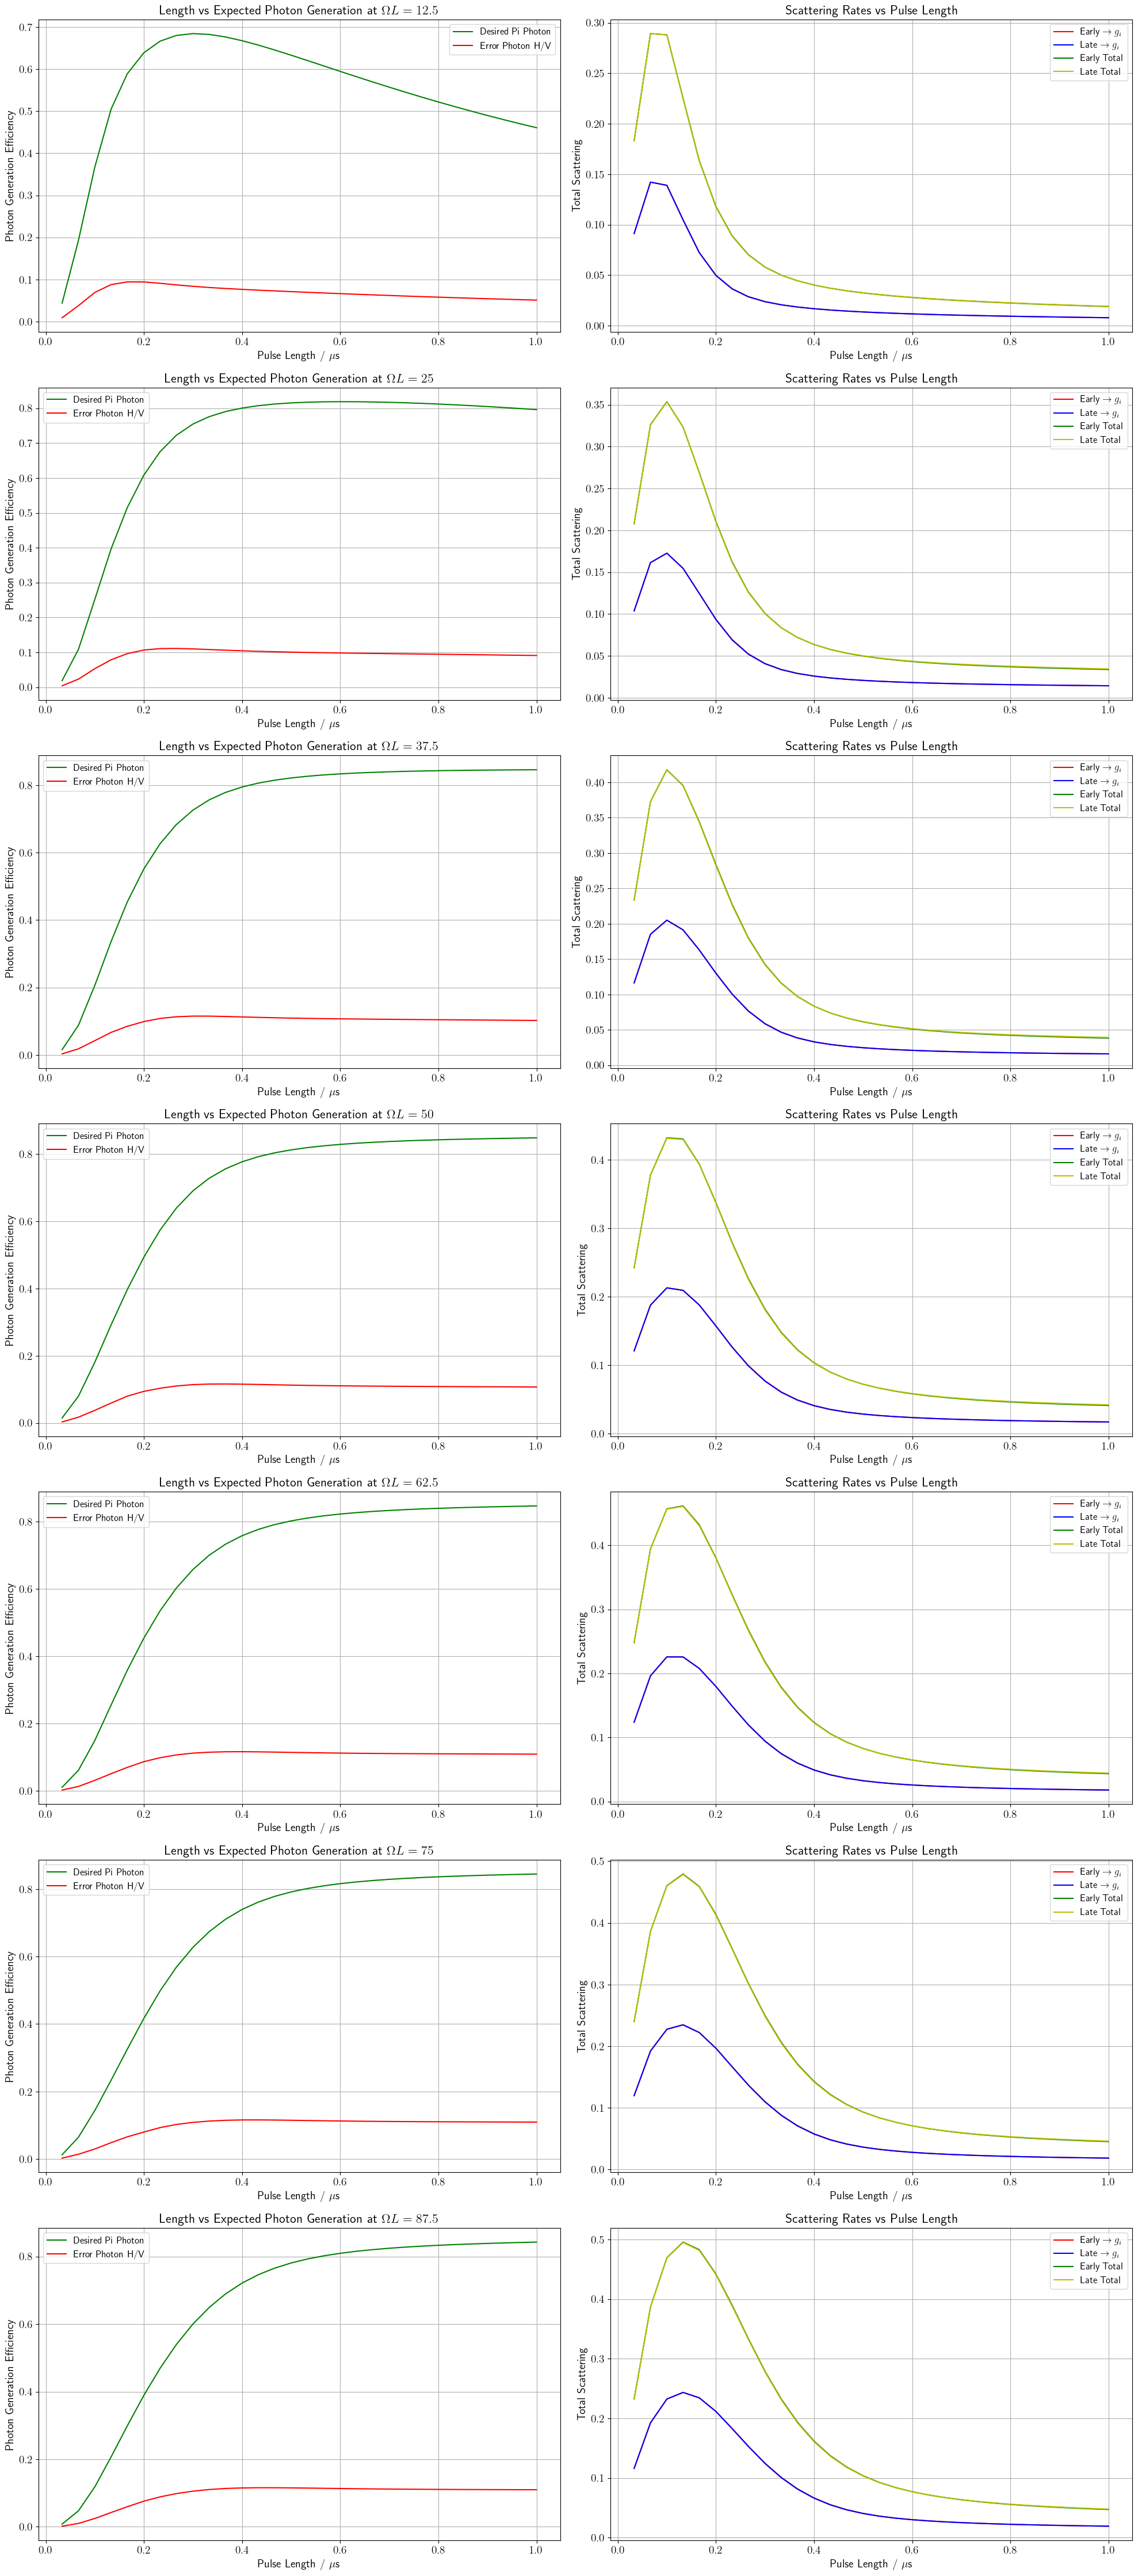

In [7]:
area_indexes=[0,1,2,3,4,5,6]
pulse_areas = [12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]

# Configure LaTeX fonts and font sizes for scientific readability
plt.rc('text', usetex=True)
plt.rc('font', size=14)  # General font size
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Label font size
plt.rc('legend', fontsize=12)  # Legend font size

# Create figure and axes
fig, axs = plt.subplots(7, 2, figsize=(20, 45))

# Plot data
for i in range(7):
    # Left column plots
    axs[i, 0].plot(len_list,
                   full_analysis_data[area_indexes[i]][2],
                   color='g',
                   linewidth=1.5,
                   label='Desired Pi Photon')
    axs[i, 0].errorbar(len_list,
                       full_analysis_data[area_indexes[i]][9],
                       color='r',
                       linewidth=1.5,
                       label='Error Photon H/V')
    axs[i, 0].legend()
    axs[i, 0].set_title(f'Length vs Expected Photon Generation at $\\Omega L={pulse_areas[i]}$')
    axs[i, 0].set_xlabel('Pulse Length / $\mu$s')
    axs[i, 0].set_ylabel('Photon Generation Efficiency')
    axs[i, 0].grid(True)

    # Right column plots
    axs[i, 1].plot(len_list,
                   full_analysis_data[area_indexes[i]][5],
                   color='r',
                   linewidth=1.5,
                   label="Early $\\rightarrow g_i$")
    axs[i, 1].plot(len_list,
                   full_analysis_data[area_indexes[i]][6],
                   color='b',
                   linewidth=1.5,
                   label="Late $\\rightarrow g_i$")
    axs[i, 1].plot(len_list,
                   full_analysis_data[area_indexes[i]][10],
                   color='g',
                   linewidth=1.5,
                   label="Early Total")
    axs[i, 1].plot(len_list,
                   full_analysis_data[area_indexes[i]][11],
                   color='y',
                   linewidth=1.5,
                   label="Late Total")
    axs[i, 1].legend()
    axs[i, 1].set_title('Scattering Rates vs Pulse Length')
    axs[i, 1].set_xlabel('Pulse Length / $\mu$s')
    axs[i, 1].set_ylabel('Total Scattering')
    axs[i, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

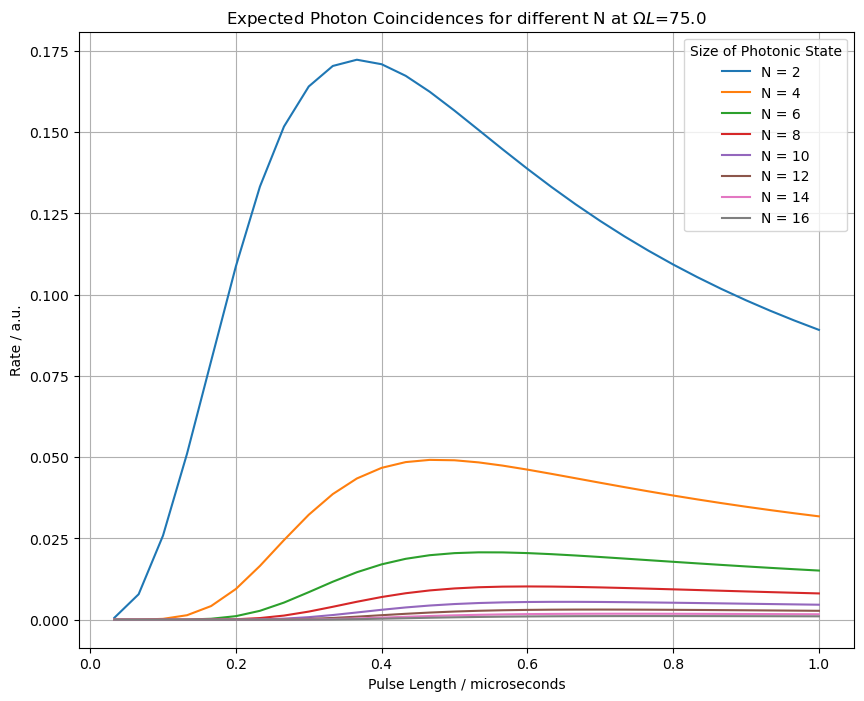

In [6]:
#pickout one fixed pulse area and consider rate optimisation

def rate_function(l,n):
    ind = np.where(l_list == l)[0][0]
    eta=full_analysis_data[5][2][ind]
    return eta**n/(4*l*n)

# Define values for l and n
l_list = np.array(len_list[0:30])
n_list = np.arange(2, 18, 2)

# Plot the rate function for each value of N
plt.figure(figsize=(10, 8))
for n in n_list:
    R = [rate_function(l, n) for l in l_list]
    plt.plot(l_list, R, label=f'N = {n}')

# Set labels and title
plt.xlabel('Pulse Length / microseconds')
plt.ylabel('Rate / a.u.')
plt.title('Expected Photon Coincidences for different N at $\Omega L$=75.0')
plt.legend(title='Size of Photonic State', loc='upper right')

# Show plot
plt.grid(True)
plt.show()




